<a href="https://colab.research.google.com/github/eva-butler/CS4774/blob/main/CS_4774_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1: Comparison of Regression Models on Predicting Medical Costs

### CS 4774 Machine Learning - Department of Computer Science - University of Virginia
![Medical Cost](https://creditkarma-cms.imgix.net/wp-content/uploads/2018/04/boomers-gen-x-high-cost-medical-care.jpg)
In this assignment, you will implement some learning models in the context of a **regression** problem in the [Medical Cost Personal Dataset on Kaggle](https://www.kaggle.com/mirichoi0218/insurance). Specifically, you will attempt to predict the medical cost billed by health insurance using other provided patient's data. For references, you may refer to [my slides](https://docs.google.com/presentation/d/10D1he89peAWaFgjtZlHpUzvOOAie_vIFT95htKCKgc0/edit#slide=id.p) or the Google Colab if you need additional sample codes to help with your assignment. To get started, you will need to upload/copy the dataset (.csv) into the same folder as this file.

For deliverables, you must write code in Colab and submit the downloaded Jupyter Notebook file (.ipynb) to earn a total of 100 pts depending on how you perform in the following sections.

To get started, you must make a copy of this template and rename it under this format: **yourUVaID_assignment_1.ipynb**. You will need to submit it with all of your outputs included to Gradecope.


***
##  Task 1: SEE THE BIG PICTURE
Write a paragraph explaining the context of the problem in which you are trying to investigate. We will assume that the data file is put into the same workspace on Colab. Then, you can write some code to load the CSV file and take a quick look at the dataset, and output the following:

 * How big is your dataset? (in terms of MB)
 * How many entries does it have?
 * How many features does it have?
 * Does it contain any categorical data?
 * Is there any missing value?
 * What are some basic statistics you can learn right away about this dataset?

In [98]:
# Import some common packages
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

# Your code goes here for this section, make sure you also include the output to answer the above questions.

#Context of the Problem: The construction of this model is with the intention to predict
#a persons medical cost billed by the insurance company based on prior patients. 
# Something like this would be incredibly usedful for when you get into an accident and need to get an idea of how 
#much you might need to pay out of pocket. 

insurance_df = pd.read_csv('insurance.csv')

#How big is the dataset?
print(os.path.getsize('insurance.csv'))

#number of entries:
print("entries: " , insurance_df.shape[0])

# number of columns
print("features: ", insurance_df.shape[1])

#cat data?
print("cat cols: ", insurance_df.select_dtypes(include=['object']).columns)

#missing vals
print(insurance_df.isnull().sum())

# get stats

print(insurance_df.describe())

print (insurance_df.info())


55628
entries:  1338
features:  7
cat cols:  Index(['sex', 'smoker', 'region'], dtype='object')
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 


---
##  Task 2: DATA DISCOVERY, CLEANING, AND SCALING

**Data Discover:** Plot out all correlations among the features. You should notice some features are more correlated with your predicted value than other. This information will help you confirm that weights of your regression model later on.

**Data Cleaning:** If your dataset has some missing values, make sure you are able to fill those values with the Imputer class. If your dataset has categorical features, make sure you conver those features into numerical using OneHotEncoder class.

**Feature Scaling** More importantly, your task is to write some codes to normalize the value of each features as follow:

* Subtract the mean value of each feature from the dataset
* Scale (divide) the feature values by their respective standard deviation

**Implementation Note:** You will need to integrate the above operations into a Pipeline to process and transform the training data, then use the same pipeline to transform any validation and testing data.

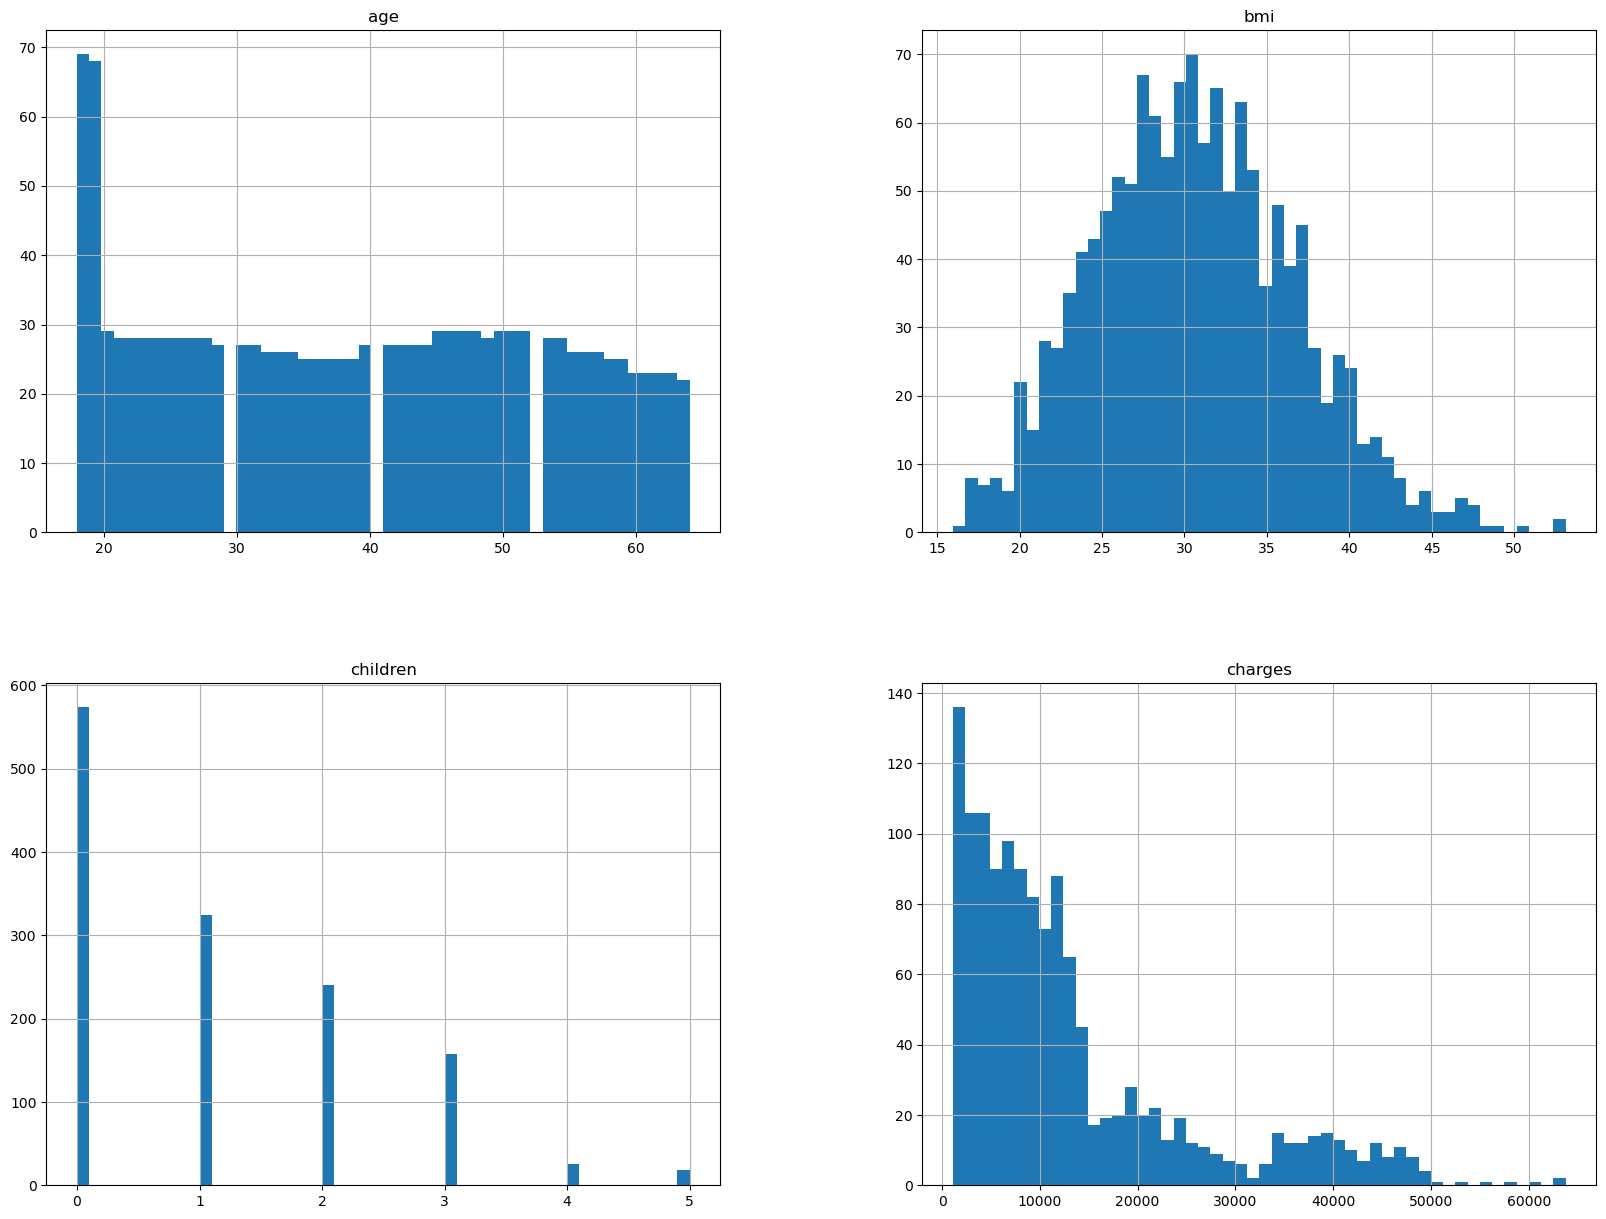

In [99]:
# You might want to use the following package
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix # optional

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Your code goes here for this section.

insurance_df.hist(bins=50, figsize=(20,15))
plt.show()




In [100]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [101]:
#Start by splitting the data into the training and test sets so there is no bias
X = insurance_df.drop(columns ='charges')
y = insurance_df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [102]:
#lets seperate the numerical and categorical features 
"""text_cols = X_train.select_dtypes(include=['object']).columns
num_features = X_train.drop(columns=text_cols)
cat_features = X_train.select_dtypes(include=['object'])

print(insurance_df['region'].unique())

#Let's just One Hot all of the categorical vars. 

from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)

insurance_cat_1hot = pd.DataFrame(onehot_encoder.fit_transform(cat_features), 
                                columns = onehot_encoder.get_feature_names_out(cat_features.columns))

insurance_cat_1hot.head()

insurance_final = pd.concat([insurance_cat_1hot, num_features], axis=1)
print(insurance_final.head())


"""

"text_cols = X_train.select_dtypes(include=['object']).columns\nnum_features = X_train.drop(columns=text_cols)\ncat_features = X_train.select_dtypes(include=['object'])\n\nprint(insurance_df['region'].unique())\n\n#Let's just One Hot all of the categorical vars. \n\nfrom sklearn.preprocessing import OneHotEncoder\nonehot_encoder = OneHotEncoder(sparse=False)\n\ninsurance_cat_1hot = pd.DataFrame(onehot_encoder.fit_transform(cat_features), \n                                columns = onehot_encoder.get_feature_names_out(cat_features.columns))\n\ninsurance_cat_1hot.head()\n\ninsurance_final = pd.concat([insurance_cat_1hot, num_features], axis=1)\nprint(insurance_final.head())\n\n\n"

In [103]:
#want to see the coorelation btwn features after changing them all to numerical
"""train_data = pd.concat([pd.DataFrame(insurance_final, columns=insurance_final.columns), pd.Series(y_train, name='charges')], axis=1)
train_data.head()

corr_matrix = train_data.corr(numeric_only=True)
corr_matrix["charges"].sort_values(ascending=False)"""

'train_data = pd.concat([pd.DataFrame(insurance_final, columns=insurance_final.columns), pd.Series(y_train, name=\'charges\')], axis=1)\ntrain_data.head()\n\ncorr_matrix = train_data.corr(numeric_only=True)\ncorr_matrix["charges"].sort_values(ascending=False)'

In [104]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
#Now lets create the pipeline that will be used to transform the datasets
text_cols = X_train.select_dtypes(include=['object']).columns
insurance_num = X_train.drop(columns=text_cols)
insurance_cat = X_train.select_dtypes(include=['object'])


numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore')) 
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, insurance_num.columns),
        ('cat', categorical_transformer, insurance_cat.columns)
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

#transform the training data and the testing data:

X_train = pipeline.fit_transform(X_train)

X_test = pipeline.transform(X_test)



- - -
## Task 3. IMPLEMENT GRADIENT DESCENT
The gradient descent formulation remain the same as one in the lecture. Keep in mind that you will need to add a column $\textbf{x}_0$ with all 1s as part of the training data. You should write code to implement the **MyLinearRegression** class and its predefined methods.

**Gradient Descent:** Notes that you may NOT call the library linear regression which defeats the purpose of this assignment. Make sure your code is well-vectorized.

In [105]:
# NOTE: You may not use the library Linear Regression, but implement your own!
# REMEMBER to place self.attribute = [] with value from your implementation

class MyLinearRegression:
  """
  Define what a linear regressor can do
  """

  def __init__ (self):
    """
    Initialize the regressor
    """
    self.theta = None; # parameter vector;
    self.alpha = None; # learning rate
    self.cost  = []; # cost function

  def fitUsingGradientDescent(self, X_train, y_train, alpha = 0.01, iters = 1000):
    """
    Train the regressor using gradient descent
    """
    # implementation code here
    X_b = np.c_[np.ones(X_train.shape[0]), X_train]
    theta_best = np.random.randn(X_b.shape[1], 1)
    self.theta = theta_best
    
    y_b = y_train.values.reshape(-1, 1)
    
    self.theta, self.cost = self.gradientDescent(X_b, y_b, self.theta, alpha,iters)
    
    

  def fitUsingNormalEquation(self, X_train, y_train):
    """
    Training using the Normal (close form) equation
    """
    # implementation code here for Task 4.
    X_b = np.c_[np.ones(X_train.shape[0]), X_train]
    y_train_column = np.array(y_train).reshape(-1, 1)
    theta_best = np.linalg.pinv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train_column)
    self.theta = theta_best

  def gradientDescent(self, X_b, y_train_column, theta, alpha, iters):
    """
    Implementatation of the gradient descent
    INPUT:
    alpha: the learning rate
    iters: number of iterations

    OUTPUT:
    theta: updated value for theta
    cost: value of the cost function
    """
    # implementation code here
    m = len(y_train)
    cost_tracker = []
    for iteration in range(iters):
      gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y_train_column)
      theta = theta -alpha *gradients
      
      predictions = X_b.dot(theta)
      errors = predictions - y_train_column
      cost = (1/m)*np.sum(errors**2)
      cost_tracker.append(cost)
      
    return theta, cost_tracker

  def predict(self, X_test):
    """
    Predicting the label
    """
    # implementation code here
    X_b = np.c_[np.ones(X_test.shape[0]), X_test]
    y_predict = X_b.dot(self.theta)
    return y_predict

  def __str__(self):
    """
    Print out the parameter out when call print()
    """
    # implement here to return("Parameter vector is %f" % self.theta)   }
    return f"Parameter vector (theta): {self.theta.flatten()}"
    

# Your code goes here to call the instance of class MyLinearRegression
myGradientDescentModel = MyLinearRegression()
myGradientDescentModel.fitUsingGradientDescent(X_train, y_train , alpha=0.01, iters=1000)

print(myGradientDescentModel)

y_pred = myGradientDescentModel.predict(X_test)

#myGradientDescentModel.fitUsingGradientDescent(X_train, y_train)

Parameter vector (theta): [ 9015.29209488  3613.93644198  2030.59286405   518.20236461
  4510.61311301  4503.71397738 -7277.68805434 16294.8300826
  2710.77853595  2322.74993281  2085.83441697  1894.57643321]


* **Learning Rate:** You will try out different learning rates for the dataset and find a learning rate that converges quickly. If you pick a learning rate, your plot of Cost Function $J(\theta)$ against number of iteration will quickly decay to a small value. This also indicates that your implementation is correct. If your learning rate is too large, the cost function $J(\theta)$ can diverge and blow up. From the below plot, you must be able to report the best learning rate the you found to earn credit for this section.

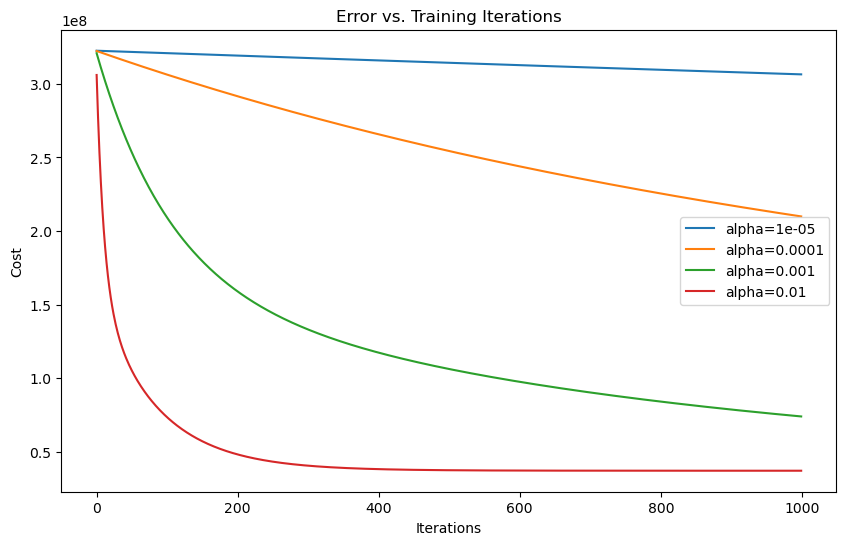

In [106]:
# Use the following code to plot out your learning rate
# iters and cost must be supplied to plot out the cost function
# You must plot multiple curves corresponding to different learning rates to justify the best one.
#

def plot_learning_rates(X_train, y_train, learning_rates, iters):
    plt.figure(figsize=(10, 6))

    for alpha in learning_rates:
        model = MyLinearRegression()
        model.fitUsingGradientDescent(X_train, y_train, alpha, iters)

        plt.plot(range(iters), model.cost, label=f'alpha={alpha}')

    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title('Error vs. Training Iterations')
    plt.legend()
    plt.show()

learning_rates = [0.00001, 0.0001, 0.001, 0.01]

iters = 1000

plot_learning_rates(X_train, y_train, learning_rates, iters)



- - -
## Task 4. IMPLEMENT THE NORMAL EQUATION

In my lecture, you learn that the closed form solution of linear regression using the normal equation formulation. Using the formula does not require any feature scaling, and should be straight forward to implement:

$
    \mathbf{\theta} = ({\mathbf{X}^{T}\mathbf{X}})^{-1}\mathbf{X}^{T}\mathbf{y}.
$

Note that you still need to add a column of 1's to the $\mathbf{
X}$ matrix to have an intercept term.

In [107]:
# Implement the normalEquation method of the MyLinearRegression Class before execute the code below:
myNormalEquationModel = MyLinearRegression()
myNormalEquationModel.fitUsingNormalEquation(X_train, y_train)


- - -
## Task 5. COMPARE DIFFERENT IMPLEMENTATIONS

You should be able to evaluate and compare your gradient descent as well as normal equation implementation of linear regression. In theory, they should be the same, or at least similar. For good measures, you must use the built-in library **Scholastic Gradient Descent (SGD)** as a third model for comparison. For each model, you must compute the RMSE on the **test set** as performance measure. The good news is that you can call library functions to compute these as shown below instead of writing your own code:

* Which one yields the best performance measure for your dataset?
* What is your assessment of the error? Good? Okay? Terrible?

In [108]:
from sklearn.metrics import mean_squared_error

# Use the built-in SGD Regressor model
from sklearn.linear_model import SGDRegressor
mySGDModel = SGDRegressor()
mySGDModel.fit(X_train,y_train)
y_predict = mySGDModel.predict(X_test)
mse = mean_squared_error(y_test, y_predict)
mySGDModel_rmse = np.sqrt(mse)
print(mySGDModel_rmse)

y_pred_gd = myGradientDescentModel.predict(X_test)
mse_gd = mean_squared_error(y_test, y_pred_gd)
rmse_gd = np.sqrt(mse_gd)
print(rmse_gd)

myNormalEquationModel = MyLinearRegression()
myNormalEquationModel.fitUsingNormalEquation(X_train, y_train)
y_pred_ne = myNormalEquationModel.predict(X_test)
mse_ne = mean_squared_error(y_test, y_pred_ne)
rmse_ne = np.sqrt(mse_ne)
print(rmse_ne)





5799.491372727634
5800.398738201462
5796.2846592762735


- - -
## Task 6. PRESENT YOUR SOLUTION

Now that you need to write a short memo of one paragraph to be read by a non-technical audience (ie. your manager/boss). Focus on answering the following:

* How can you pitch your solution to this project?
* What did you learn so far about the problem?
* Is there any insight moving forward to improve the solution.

In [109]:
# Your paragraph goes here for this section

For this project, we looked at three different approaches to predict outcomes using linear regression. Each of the methods aims to optimize a model that can predict future outcomes of events based on previous events. Each of the methods performed similarly with a rmse of 5807, 5800, and 5796. Lets look at the three different approaches and their similarities and differences. Gradient Descent iteratively changed the model params by minimimizing the mse. The Normal Equation directly computes the optimal model params and no iterations are needed. Finally, SGD is more similar to GD, it just also updates the parameters one data point at a time. Part of the pitch could be comparing the performance of the different strategys.

- - -
### NEED HELP?

In case you get stuck in any step in the process, you may find some useful information from:

 * Consult my [slides](https://docs.google.com/presentation/d/10D1he89peAWaFgjtZlHpUzvOOAie_vIFT95htKCKgc0/edit?usp=sharing) and/or the textbook
 * Talk to the TA, they are available and there to help you during [office hour](http://bit.ly/cs4774oh)
 * Come talk to me or email me <nn4pj@virginia.edu> with subject starting "CS 4774 Assignment 1:...".

Best of luck and have fun!